## Maximum Subarray
##### Name: Pranisaa Charnparttaravanit
##### ID: st121720

Program the maximum subarray problem in python.

Seek to plot the actual time spent and compare with the theoretical complexity we learn in the class.  Attempt to compare many sizes of n.   Are the actual time close with the theoretical complexity?

Report your findings.

Submit the followings:
1. Python code in pdf (exported)
2. Your report (please keep them short - like one page) reporting your experiment findings - **no cover pages needed!**

In [106]:
import numpy as np
import time 
import random
import math
import matplotlib.pyplot as plt

In [120]:
def lst(n):
    A = np.random.randint(-100,100,size=(1,n))
    np.random.seed(1)
    A = list(A[0])
    return A

In [146]:
def findmax_cross_sub(A,low,mid,high):
    left_sum = -10000000000
    sum = 0
    for i in range(mid,low-1,-1):
        sum = sum +A[i]
        if sum > left_sum:
            left_sum = sum
            max_left = i
    right_sum = -100000000000
    sum1 = 0
    for j in range(mid+1,high+1):
        sum1 = sum1 = sum1 + A[j]
        if sum1 > right_sum:
            right_sum = sum1
            max_right = j
    return(max_left, max_right, left_sum + right_sum)

def findmax_sub(A,low,high):
    if A[high] == A[low]:
        return(low,high,A[low])
    else: 
        mid = math.floor((low+high)/2)
        (left_low,left_high,left_sum)  = findmax_sub(A,low,mid)
        (right_low,right_high,right_sum) = findmax_sub(A,mid+1,high)
        (cross_low,cross_high,cross_sum) = findmax_cross_sub(A,low,mid,high)
        if left_sum >= right_sum and left_sum >= cross_sum:
            return (left_low,left_high,left_sum)
        elif right_sum >= left_sum and right_sum >= cross_sum:
            return  (right_low,right_high,right_sum)
        else:
            return (cross_low,cross_high,cross_sum)

In [148]:
n = 7
A = lst(n)
print(A)
findmax_sub(A,0,n-1)

[-63, 40, -28, 37, 33, -21, 92]


(1, 6, 153)

In [150]:
maxsubtime = []

def findmaxsubtime(n):
    t0 = time.time()
    A = lst(n)
    low = 0
    high =n-1
    findmax_sub(A,low,high)
    endtime = time.time()
    return (endtime - t0)

maxsubtime.append(findmaxsubtime(10))
maxsubtime.append(findmaxsubtime(50))
maxsubtime.append(findmaxsubtime(100))
maxsubtime.append(findmaxsubtime(1000))
print(maxsubtime)

[0.0003459453582763672, 0.0009028911590576172, 0.0017459392547607422, 0.01921534538269043]


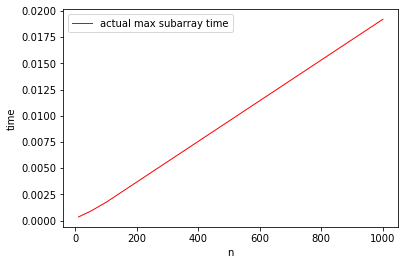

In [158]:
n = [10,50,100,1000]
plt.plot(n, maxsubtime, '-r',linewidth=1.0,label = 'actual max subarray time')
plt.xlabel('n')
plt.ylabel('time')
plt.legend() 
plt.show()

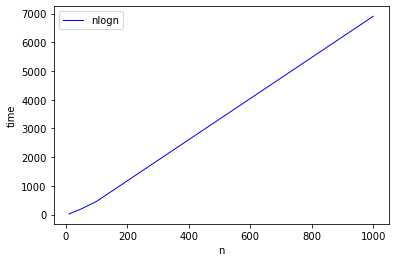

In [159]:
n = [10,50,100,1000]
y = [math.log(x)*x for x in n]
plt.plot(n,y,'-b',linewidth=1.0, label = 'nlogn')
plt.xlabel('n')
plt.ylabel('time')
plt.legend() 
plt.show()

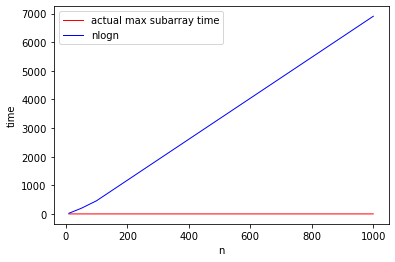

In [161]:
n = [10,50,100,1000]
plt.plot(n, maxsubtime, '-r',linewidth=1.0,label = 'actual max subarray time')
y = [math.log(x)*x for x in n]
plt.plot(n,y,'-b',linewidth=1.0, label = 'nlogn')
plt.xlabel('n')
plt.ylabel('time')
plt.legend() 
plt.show()

### What I learnt

As shown above(the first two plots), the graphs are similar in shape. This similarity indicates that the complexity of 'Maximum Subarray' problem can be assumed to be equal to nlogn.

However, when plotted together, it may be difficult to distinguish this fact due to the difference in their scales in the y-axis.
The reason being is that nlogn measures the number of steps, while y-values of "the actual maximum subarray time" are measured in the unit of seconds.
